In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
brain_mri = nib.load('../datasets/preprocessing/IXI662-Guys-1120-T1.nii.gz')
brain_mri_data = brain_mri.get_fdata()
brain_mri.shape

(256, 256, 150)

In [4]:
affine = brain_mri.affine
shape = brain_mri.shape
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [5]:
# Last row and Last column together is called the offset
print(affine[-1]) # last row
print(affine[:,-1]) # last column = ophysical coords

[0. 0. 0. 1.]
[ -90.67985535  102.82944489 -114.82378387    1.        ]


In [6]:
# 3x3 defines the scaling, rotation and shearing parameters
affine[:-1,:-1]

array([[ 1.89821944e-02, -2.72075552e-03,  1.19975281e+00],
       [-9.27821696e-01,  1.32986516e-01,  2.45456006e-02],
       [ 1.33014351e-01,  9.28015888e-01,  5.71511449e-11]])

In [7]:
# Volume covered by voxel (volumne pixel), Units are in mm
print(brain_mri.header.get_zooms())
print(f"Volume of each voxel: {np.prod(brain_mri.header.get_zooms()):.4f} mm^3")

(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))
Volume of each voxel: 1.0547 mm^3


In [8]:
# Fetch orientation
# P - Moves from Anterior to Posterior
# S - Moves from Inferior to Superior
# R - Moves from Left to Right
nib.aff2axcodes(affine)

('P', 'S', 'R')

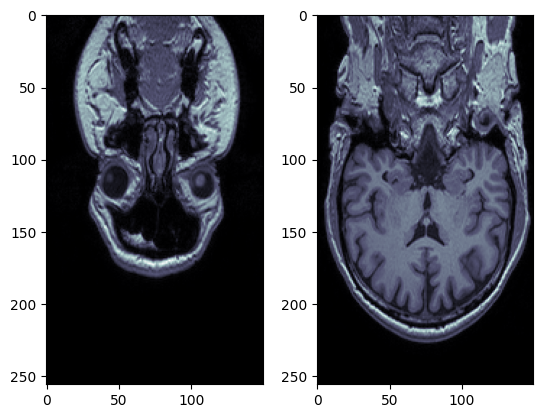

In [60]:
fig, axis = plt.subplots(1,2)
# Displaying images moving from back to front (Image is upside down here)
axis[0].imshow(brain_mri_data[40,:,:], cmap='bone')
axis[1].imshow(brain_mri_data[120,:,:], cmap='bone')

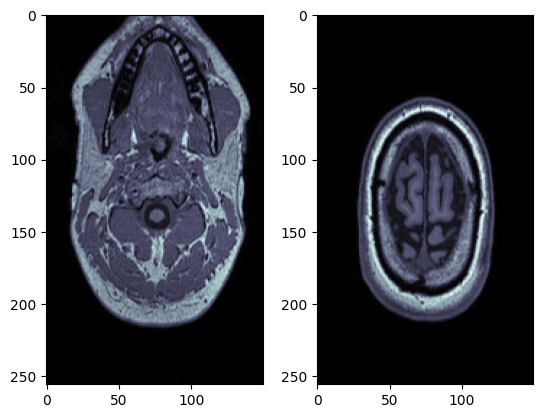

In [12]:
fig, axis = plt.subplots(1,2)
# Displaying images moving from bottom to top
axis[0].imshow(brain_mri_data[:,30,:], cmap='bone')
axis[1].imshow(brain_mri_data[:,200,:], cmap='bone')

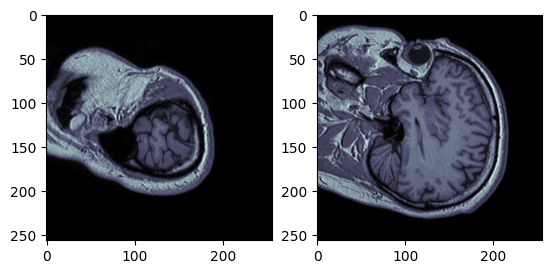

In [14]:
fig, axis = plt.subplots(1,2)
# Displaying images moving from left to right
axis[0].imshow(brain_mri_data[:,:,20], cmap='bone')
axis[1].imshow(brain_mri_data[:,:,45], cmap='bone')

In [ ]:
# Code to animate
# from matplotlib.animation import FuncAnimation

# # Define the figure and axis
# fig, ax = plt.subplots()

# # Display the first slice initially
# slice_index = 0
# img = ax.imshow(brain_mri_data[:, :, slice_index], cmap='gray')

# # Define the update function for the animation
# def updateImg(slice_index):
#     ax.set_title(f'Slice {slice_index}')
#     img.set_data(brain_mri_data[:, :, slice_index])
#     return img,

# # Create an animation: we can show all slices along the z-axis
# anim = FuncAnimation(fig, updateImg, frames=brain_mri_data.shape[2], interval=200, blit=False)
# # Save the animation as a GIF
# anim.save('R_mri_animation.gif', writer='imagemagick', fps=60)


In [29]:
# Convert voxel coords to physical coords
# Approach 1
voxel_coords = np.array((0,0,0,1))
physical_coords = affine@voxel_coords # physical coords = Affine matrix * voxel coords
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [31]:
# Approach 2
voxel_coords = np.array((0,0,0))
physical_coords_manual = affine[:3,:3] @ voxel_coords
physical_coords_manual += affine[:3,3]
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [36]:
# Convert physical coords to voxel coords
(np.linalg.inv(affine) @ physical_coords).round()

array([0., 0., 0., 1.])

## **Resmapling**

In [37]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))


In [41]:
import nibabel.processing

voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128,128,100), voxel_size, orientation='PSR')
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [46]:
print(f"Resampled shape: {brain_mri_resized_data.shape}")
print(f"Size of each voxel: {brain_mri_resized.header.get_zooms()}")

Resampled shape: (128, 128, 100)
Size of each voxel: (np.float32(2.0), np.float32(2.0), np.float32(2.0))


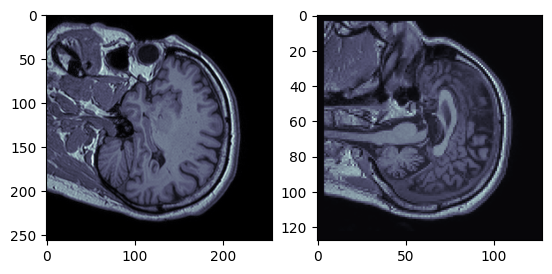

In [49]:
fig, axis = plt.subplots(1,2)
# Displaying images moving from left to right
axis[0].imshow(brain_mri_data[:,:,50], cmap='bone')
axis[1].imshow(brain_mri_resized_data[:,:,50], cmap='bone')

## **Normalization and Standardization**

In [52]:
lung_ct = nib.load('../datasets/preprocessing/lung_043.nii.gz')
lung_ct_data = lung_ct.get_fdata()
lung_ct_data.shape

(512, 512, 129)

### **Lung Data**

In [71]:
# Affine
lung_ct_affine = lung_ct.affine
print(lung_ct_affine)

print()

# Volume of each voxel
print(lung_ct.header.get_zooms())

print()

# Orientation
print(nib.aff2axcodes(lung_ct_affine))



[[  -0.76953101    0.            0.          193.28475952]
 [   0.            0.76953101    0.         -204.34831238]
 [   0.            0.            2.5        -305.5       ]
 [   0.            0.            0.            1.        ]]

(np.float32(0.769531), np.float32(0.769531), np.float32(2.5))

('L', 'A', 'S')


In [53]:
# Standardization
lung_ct_data_standardized = lung_ct_data/ 3071 # The value is obtained from standardization practises for specific type of medical scan

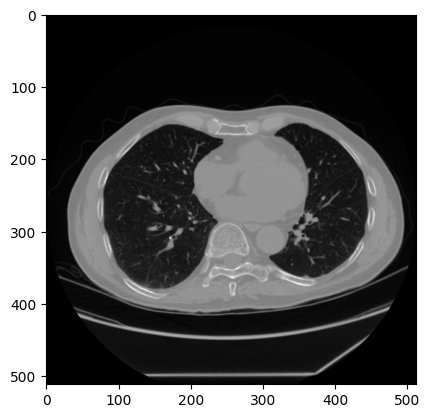

In [62]:
plt.imshow(np.rot90(lung_ct_data_standardized[:,:,50]), cmap = 'gray')

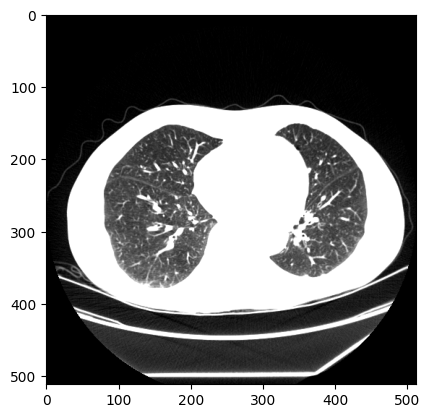

In [73]:
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500) # np.clip basically reassigns value that are beyond the range to either min or max value
plt.imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap='gray')

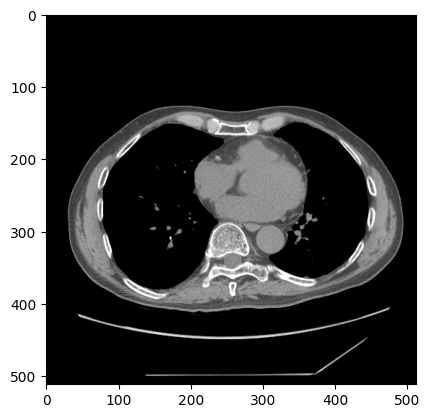

In [74]:
lung_ct_lung_window = np.clip(lung_ct_data, -250, 250) # np.
plt.imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap='gray')

### **Heart data**

In [84]:
cardiac_mri = nib.load('../datasets/preprocessing/la_003.nii.gz')
cardiac_mri_data = cardiac_mri.get_fdata()
cardiac_mri_data.shape

(320, 320, 130)

In [87]:
# Affine
cardiac_mri_affine = cardiac_mri.affine
print(cardiac_mri_affine)

print()

# Volume of each voxel
print(cardiac_mri.header.get_zooms())

print()

# Orientation
print(nib.aff2axcodes(cardiac_mri_affine))



[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]

(np.float32(1.25), np.float32(1.25), np.float32(1.37))

('R', 'A', 'S')


In [85]:
# Standardization
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std

cardiac_mri_standarized = (cardiac_mri_data - np.min(cardiac_mri_data)) / (np.max(cardiac_mri_data) - np.min(cardiac_mri_data))

In [86]:
np.mean(cardiac_mri_standarized), np.min(cardiac_mri_standarized), np.max(cardiac_mri_standarized)

(np.float64(0.08641350659554545), np.float64(0.0), np.float64(1.0))

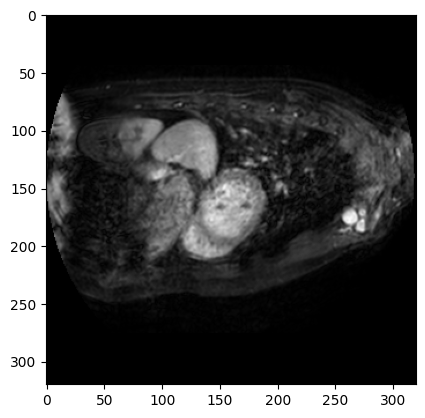

In [88]:
plt.imshow(cardiac_mri_standarized[:,:,30], cmap='gray')